<a href="https://colab.research.google.com/github/prateekchandrajha/ir-mini-project/blob/main/IR_project_Bleu_Score_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculations of the Bilingual Evaluation Understudy (BLEU) Score (IR Mini-Project)

Our project focuses on Neural Machine Translation using Attention Models but we also require a benchmark metric or a general scoring mechanism to gauge how good our translations have been. This is a fairly convoluted topic so we give a code walk-through of a well known scoring metric called the BLEU Score. 

In this part of the project submission, we will implement a popular metric for evaluating the quality of machine-translated text: the BLEU score proposed by Kishore Papineni, et al. In their 2002 paper ["BLEU: a Method for Automatic Evaluation of Machine Translation"](https://www.aclweb.org/anthology/P02-1040.pdf), the BLEU score works by comparing "candidate" text to one or more "reference" translations. 

The result is better when the score is closer to 1. In the following sections, we implement the pipeline for getting this score.

# Part 1:  BLEU Score

## 1.1  Importing the Libraries

One can very well locate libraries assisting in finding the BLEU Score like Sacrebleu package but here we try to implement our own version of the Bleu Score and gauge it against the established packages to form a well rounded understanding of the subject at hand. We will implement our own version of the BLEU Score using Numpy. To verify that our implementation is correct, we will compare our results with those generated by the [SacreBLEU library](https://github.com/mjpost/sacrebleu). This package provides hassle-free computation of shareable, comparable, and reproducible BLEU scores. It also knows all the standard test sets and handles downloading, processing, and tokenization.

In [2]:
import numpy as np                  # import numpy to make numerical computations.
import nltk                         # import NLTK to handle simple NL tasks like tokenization.
nltk.download("punkt")
from nltk.util import ngrams
from collections import Counter     # import the Counter module.
!pip3 install 'sacrebleu'           # install the sacrebleu package.
import sacrebleu                    # import sacrebleu in order compute the BLEU score.
import matplotlib.pyplot as plt     # import pyplot in order to make some illustrations.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1.2  Let's Define the BLEU Score

The formula for calculating the BLEU score is given below. Mathematically, we can express the BLEU score as:

$$BLEU = BP\Bigl(\prod_{i=1}^{4}precision_i\Bigr)^{(1/4)}$$

with the Brevity Penalty and precision defined as:

$$BP = min\Bigl(1, e^{(1-({ref}/{cand}))}\Bigr)$$

$$precision_i = \frac {\sum_{snt \in{cand}}\sum_{i\in{snt}}min\Bigl(m^{i}_{cand}, m^{i}_{ref}\Bigr)}{w^{i}_{t}}$$

where:

* $m^{i}_{cand}$, is the count of i-gram in candidate matching the reference translation.
* $m^{i}_{ref}$, is the count of i-gram in the reference translation.
* $w^{i}_{t}$, is the total number of i-grams in candidate translation.

## 1.3 Explaining the BLEU score

### Brevity Penalty (Explanation with Example):

- The brevity penalty penalizes generated translations that are too short compared to the closest reference length with an exponential decay. 
- The brevity penalty compensates for the fact that the BLEU score has no recall term.



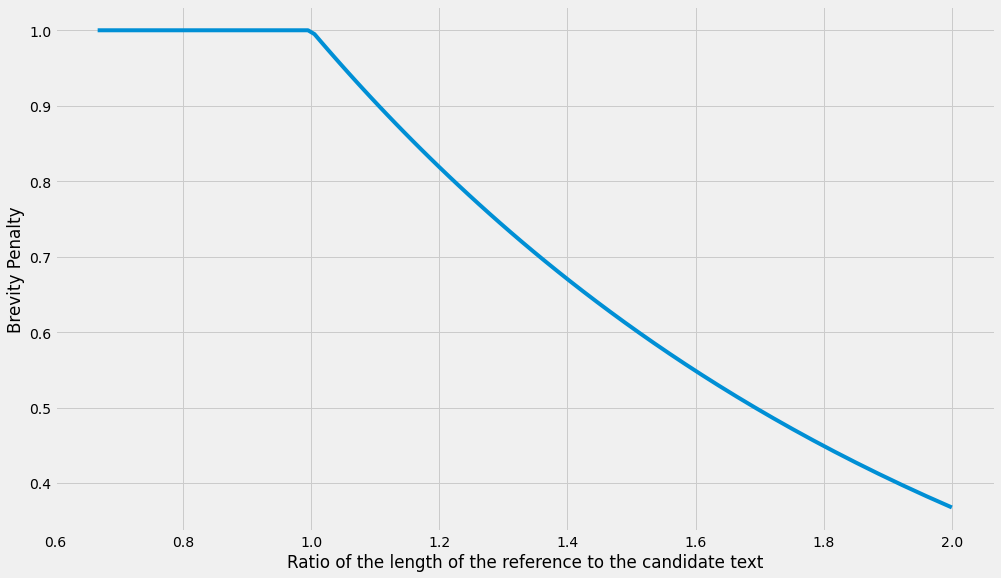

In [16]:
ref_length = np.ones(100)
can_length = np.linspace(1.5, 0.5, 100)
x = ref_length / can_length
y = 1 - x
y = np.exp(y)
y = np.minimum(np.ones(y.shape), y)

plt.style.use('fivethirtyeight')

# Plot Code
fig = plt.figure(figsize=(15,9))
# fig, ax = plt.subplots(1) - THIS TYPE OF PLOTTING CODE HAS LESS CLARITY!
ax = fig.subplots(1)

lines = ax.plot(x, y)
ax.set(
    xlabel="Ratio of the length of the reference to the candidate text",
    ylabel="Brevity Penalty",
)
plt.show()

### N-Gram Precision (Explanation with Example):

The n-gram precision counts how many unigrams, bigrams, trigrams, and four-grams (i=1,...,4) match their n-gram counterpart in the reference translations. This term acts as a precision metric. Unigrams account for adequacy while longer n-grams account for fluency of the translation. To avoid overcounting, the n-gram counts are clipped to the maximal n-gram count occurring in the reference ($m_{n}^{ref}$). Typically precision shows exponential decay with the with the degree of the n-gram.

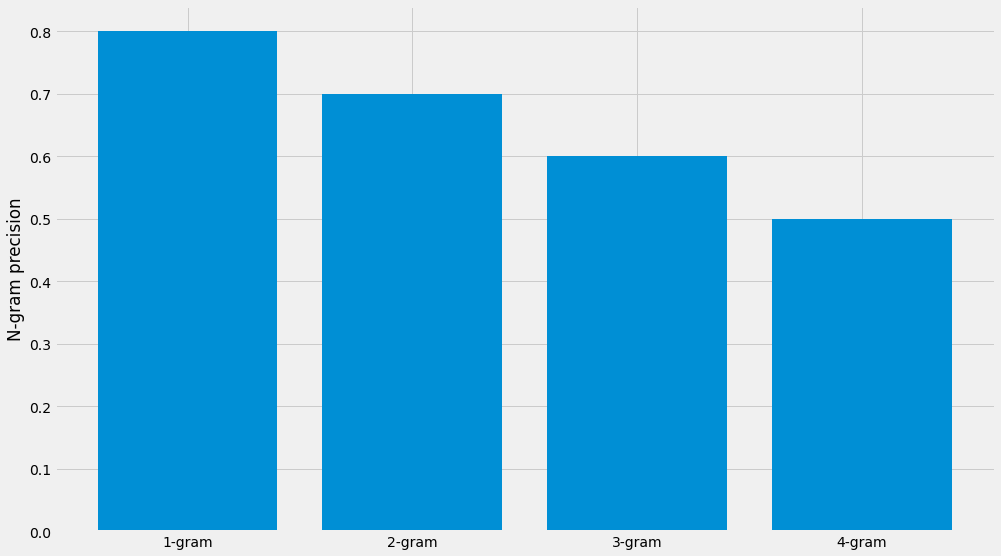

In [17]:
data = {"1-gram": 0.8, "2-gram": 0.7, "3-gram": 0.6, "4-gram": 0.5}
names = list(data.keys())
values = list(data.values())

# fig, ax = plt.subplots(1)
fig = plt.figure(figsize=(15,9))
# fig, ax = plt.subplots(1) - THIS TYPE OF PLOTTING CODE HAS LESS CLARITY!
ax = fig.subplots(1)
bars = ax.bar(names, values)
ax.set(ylabel="N-gram precision")

plt.show()

### N-gram BLEU score (Simple Example):

When the n-gram precision is multiplied by the BP, then the exponential decay of n-grams is almost fully compensated. The BLEU score corresponds to a geometric average of this modified n-gram precision.

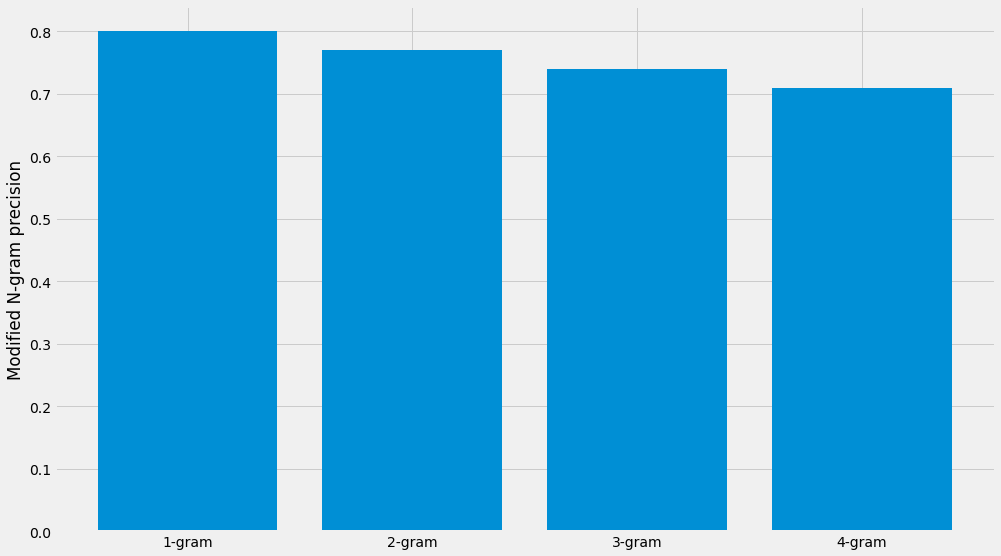

In [18]:
data = {"1-gram": 0.8, "2-gram": 0.77, "3-gram": 0.74, "4-gram": 0.71}
names = list(data.keys())
values = list(data.values())

# fig, ax = plt.subplots(1)
fig = plt.figure(figsize=(15,9))
# fig, ax = plt.subplots(1) - THIS TYPE OF PLOTTING CODE HAS LESS CLARITY!
ax = fig.subplots(1)
bars = ax.bar(names, values)
ax.set(ylabel="Modified N-gram precision")

plt.show()

## 1.4 Example Calculations of the BLEU score

In this example we will have a reference translation and 2 candidates translations and using them we will demonstrate the working of the BLEU Score. 

We will tokenize all sentences using the NLTK package. The Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing.

In [19]:
reference = "The NASA Opportunity rover is battling a massive dust storm on planet Mars."
candidate_1 = "The Opportunity rover is combating a big sandstorm on planet Mars."
candidate_2 = "A NASA rover is fighting a massive storm on planet Mars."

tokenized_ref = nltk.word_tokenize(reference.lower())
tokenized_cand_1 = nltk.word_tokenize(candidate_1.lower())
tokenized_cand_2 = nltk.word_tokenize(candidate_2.lower())

print(f"{reference} -> {tokenized_ref}")
print("\n")
print(f"{candidate_1} -> {tokenized_cand_1}")
print("\n")
print(f"{candidate_2} -> {tokenized_cand_2}")

The NASA Opportunity rover is battling a massive dust storm on planet Mars. -> ['the', 'nasa', 'opportunity', 'rover', 'is', 'battling', 'a', 'massive', 'dust', 'storm', 'on', 'planet', 'mars', '.']


The Opportunity rover is combating a big sandstorm on planet Mars. -> ['the', 'opportunity', 'rover', 'is', 'combating', 'a', 'big', 'sandstorm', 'on', 'planet', 'mars', '.']


A NASA rover is fighting a massive storm on planet Mars. -> ['a', 'nasa', 'rover', 'is', 'fighting', 'a', 'massive', 'storm', 'on', 'planet', 'mars', '.']


### STEP 1: Computing the Brevity Penalty

In [20]:
def brevity_penalty(reference, candidate):
    ref_length = len(reference)
    can_length = len(candidate)

    # Brevity Penalty
    if ref_length > can_length:
        BP = 1
    else:
        penalty = 1 - (ref_length / can_length)
        BP = np.exp(penalty)

    return BP

### STEP 2: Computing the Precision

In [21]:
def clipped_precision(reference, candidate):
    """
    Bleu score function given a original and a machine translated sentences
    """

    clipped_precision_score = []

    for i in range(1, 5):
        candidate_n_gram = Counter(
            ngrams(candidate, i)
        )  # counts of n-gram n=1...4 tokens for the candidate
        reference_n_gram = Counter(
            ngrams(reference, i)
        )  # counts of n-gram n=1...4 tokens for the reference

        c = sum(
            reference_n_gram.values()
        )  # sum of the values of the reference the denominator in the precision formula

        for j in reference_n_gram:  # for every n_gram token in the reference
            if j in candidate_n_gram:  # check if it is in the candidate n-gram

                if (
                    reference_n_gram[j] > candidate_n_gram[j]
                ):  # if the count of the reference n-gram is bigger
                    # than the corresponding count in the candidate n-gram
                    reference_n_gram[j] = candidate_n_gram[
                        j
                    ]  # then set the count of the reference n-gram to be equal
                    # to the count of the candidate n-gram
            else:

                reference_n_gram[j] = 0  # else reference n-gram = 0

        clipped_precision_score.append(sum(reference_n_gram.values()) / c)

    weights = [0.25] * 4

    s = (w_i * np.log(p_i) for w_i, p_i in zip(weights, clipped_precision_score))
    s = np.exp(np.sum(s))
    return s

### STEP 3: Computing the BLEU score

In [22]:
def bleu_score(reference, candidate):
    BP = brevity_penalty(reference, candidate)
    precision = clipped_precision(reference, candidate)
    return BP * precision

### STEP 4: Testing with our Example Reference and Candidates Sentences

In [23]:
print(
    "Results reference versus candidate 1 our own code BLEU: ",
    round(bleu_score(tokenized_ref, tokenized_cand_1) * 100, 1),
)
print(
    "Results reference versus candidate 2 our own code BLEU: ",
    round(bleu_score(tokenized_ref, tokenized_cand_2) * 100, 1),
)

Results reference versus candidate 1 our own code BLEU:  27.4
Results reference versus candidate 2 our own code BLEU:  35.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


### STEP 5: Comparing the Results from our Code with the SacreBLEU Library

As you can see, they match exactly demonstrating the correctness of our BLEU Score implementation.

In [24]:
print(
    "Results reference versus candidate 1 sacrebleu library sentence BLEU: ",
    round(sacrebleu.corpus_bleu(reference, candidate_1).score, 1),
)
print(
    "Results reference versus candidate 2 sacrebleu library sentence BLEU: ",
    round(sacrebleu.corpus_bleu(reference, candidate_2).score, 1),
)

Results reference versus candidate 1 sacrebleu library sentence BLEU:  27.4
Results reference versus candidate 2 sacrebleu library sentence BLEU:  35.0


# Part 2:  BLEU computation on a corpus of documents

## Loading Data Sets for Evaluation Using the BLEU Score

In this section, we will show a simple pipeline for evaluating machine translated text. Due to storage and speed constraints, we will not be using our own model in this lab (you'll get to do that in the assignment!). Instead, we will be using [Google Translate](https://translate.google.com) to generate English to German translations and we will evaluate it against a known evaluation set. There are three files we will need and we've kept them in our [project github repository](https://github.com/prateekchandrajha/ir-mini-project):

1. A source text in English. We will use the first 1671 words of the [wmt19](http://statmt.org/wmt19/translation-task.html) evaluation dataset downloaded via SacreBLEU. We just grabbed a subset because of limitations in the number of words that can be translated using Google Translate.

2. A reference translation to German of the corresponding first 1671 words from the original English text. This is also provided by SacreBLEU package.

3. A candidate machine translation to German from the same 1671 words. This is generated by feeding the source text to a machine translation model. As mentioned above, we will use Google Translate to generate the translations in this file.

With that, we can now compare the reference and the candidate translation to get the BLEU Score.

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# UNCOMMENT AND RUN THIS COMMAND BELOW TO INSTALL WGET PACKAGE, URLLIB & REQUESTS DON'T WORK AS INTENDED WITH GITHUB FILE ACCESS
# !pip install wget

In [75]:
# import urllib.request
# import requests
import wget

urls = ['https://raw.githubusercontent.com/prateekchandrajha/ir-mini-project/main/wmt19_can.txt', 
        'https://raw.githubusercontent.com/prateekchandrajha/ir-mini-project/main/wmt19_ref.txt', 
        'https://raw.githubusercontent.com/prateekchandrajha/ir-mini-project/main/wmt19_src.txt']

files = []
for url in urls:
  # requests.get(url, filename)
  # r = urllib.request.urlopen(url)
  # files.append(r.read())
  files.append(wget.download(url))

In [80]:
# Loading the raw data
wmt19news_src = open(files[2], "rU")
wmt19news_src_1 = wmt19news_src.read()
wmt19news_src.close()
wmt19news_ref = open(files[1], "rU")
wmt19news_ref_1 = wmt19news_ref.read()
wmt19news_ref.close()
wmt19news_can = open(files[0], "rU")
wmt19news_can_1 = wmt19news_can.read()
wmt19news_can.close()

# Tokenizing the raw data
tokenized_corpus_src = nltk.word_tokenize(wmt19news_src_1.lower())
tokenized_corpus_ref = nltk.word_tokenize(wmt19news_ref_1.lower())
tokenized_corpus_cand = nltk.word_tokenize(wmt19news_can_1.lower())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 'U' mode is deprecated
  


Inspecting the first sentence of the data.

In [81]:
print("English source text:")
print("\n")
print(f"{wmt19news_src_1[0:170]} -> {tokenized_corpus_src[0:30]}")
print("\n")
print("German reference translation:")
print("\n")
print(f"{wmt19news_ref_1[0:219]} -> {tokenized_corpus_ref[0:35]}")
print("\n")
print("German machine translation:")
print("\n")
print(f"{wmt19news_can_1[0:199]} -> {tokenized_corpus_cand[0:29]}")

English source text:


﻿Welsh AMs worried about 'looking like muppets'
There is consternation among some AMs at a suggestion their title should change to MWPs (Member of the Welsh Parliament).
 -> ['\ufeffwelsh', 'ams', 'worried', 'about', "'looking", 'like', "muppets'", 'there', 'is', 'consternation', 'among', 'some', 'ams', 'at', 'a', 'suggestion', 'their', 'title', 'should', 'change', 'to', 'mwps', '(', 'member', 'of', 'the', 'welsh', 'parliament', ')', '.']


German reference translation:


﻿Walisische Ageordnete sorgen sich "wie Dödel auszusehen"
Es herrscht Bestürzung unter einigen Mitgliedern der Versammlung über einen Vorschlag, der ihren Titel zu MWPs (Mitglied der walisischen Parlament) ändern soll.
 -> ['\ufeffwalisische', 'ageordnete', 'sorgen', 'sich', '``', 'wie', 'dödel', 'auszusehen', "''", 'es', 'herrscht', 'bestürzung', 'unter', 'einigen', 'mitgliedern', 'der', 'versammlung', 'über', 'einen', 'vorschlag', ',', 'der', 'ihren', 'titel', 'zu', 'mwps', '(', 'mitglied', 'd

## As we see below, our own BLEU Score implementation gives 23.7

In [82]:
print(
    "Results reference versus candidate 1 our own BLEU implementation: ",
    round(bleu_score(tokenized_corpus_ref, tokenized_corpus_cand) * 100, 1),
)

Results reference versus candidate 1 our own BLEU implementation:  23.7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


## As we see below, Sacrebleu package BLEU Score implementation gives 23.5

In [83]:
print(
    "Results reference versus candidate 1 sacrebleu library BLEU: ",
    round(sacrebleu.corpus_bleu(wmt19news_ref_1, wmt19news_can_1).score, 1),
)

Results reference versus candidate 1 sacrebleu library BLEU:  23.5


**BLEU Score Interpretation on a Corpus**

|Score      | Interpretation                                                |
|:---------:|:-------------------------------------------------------------:|
| < 10      | Almost useless                                                |
| 10 - 19   | Hard to get the gist                                          |
| 20 - 29   | The gist is clear, but has significant grammatical errors     |
| 30 - 40   | Understandable to good translations                           |
| 40 - 50   | High quality translations                                     |
| 50 - 60   | Very high quality, adequate, and fluent translations          |
| > 60      | Quality often better than human                               |

From the table above (taken [here](https://cloud.google.com/translate/automl/docs/evaluate)), we can see the gist of the translation is clear but has significant grammatical errors. Nonetheless, the results of our coded BLEU score are almost identical to those of the SacreBLEU package.

### Code References:

- https://cloud.google.com/translate/automl/docs/evaluate
- https://www.coursera.org/specializations/natural-language-processing
- https://github.com/uzaymacar/attention-mechanisms